In [16]:
4.) Exploratory Data Analysis on Haberman Dataset.
source- kaggle, github and stackoverflow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [17]:
import pandas as pd
df =  pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()


,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


In [49]:
print(df)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


# high level statistics of dataset

In [18]:
#no.of data points
print(df.shape)

(307, 4)


In [19]:
#no of features
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [20]:
#no of classes and data points per class
df['survival_status'].value_counts()

1         225
2          81
status      1
Name: survival_status, dtype: int64

This is an imbalanced dataset where the survival status is different for type 1 and type 2.

In [52]:
print(df.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


# Pair-plots

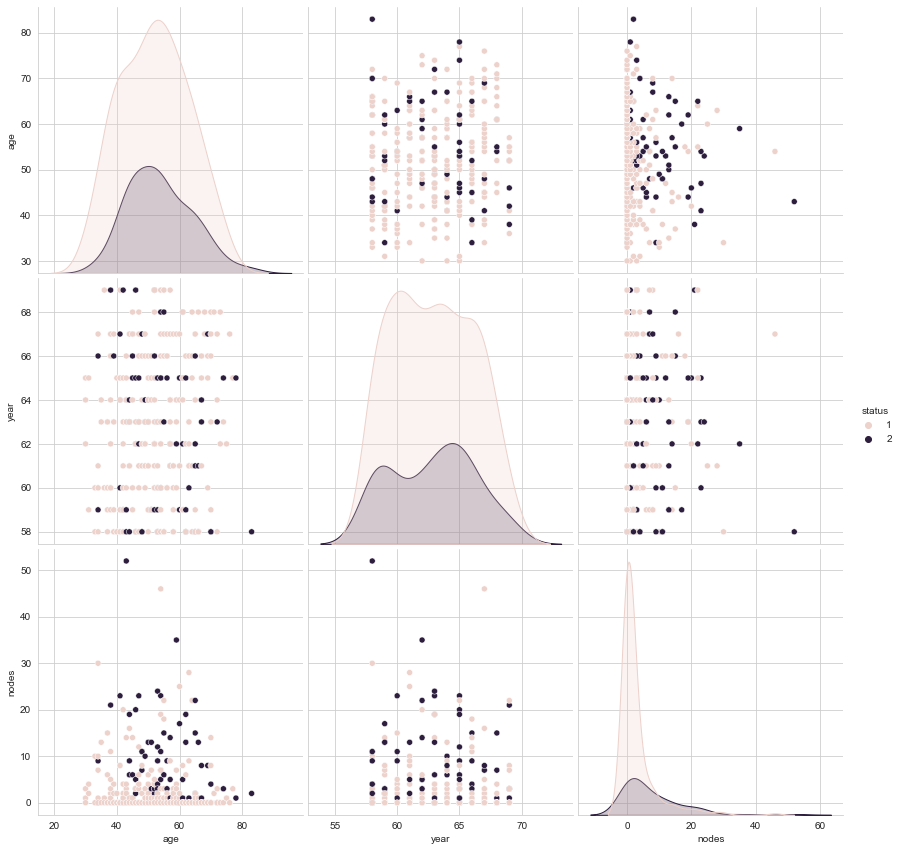

In [48]:
sns.pairplot(df, hue='status', size=4)
plt.show()

its difficult to reach a conclusion from these pair plots.

# Objective:- 
This is a classification problem where class label is survival_status. we are performing EDA on this dataset to find out important features are which features are important to identify the survival status of patients.

Columns:
1.) age = Patients age at the time of operation. 
2.) operational_year = Year of Operation. 
3.) axil_nodes = Number of auxiliary nodes detected as positive
4.) survival_status = 1 - Patient survied more than 5 years.   
                      2 - Patient survived less than 5 years.

# Univariate analysis (pdf, cdf, boxplot and violin plot)

1.) Probability density function.

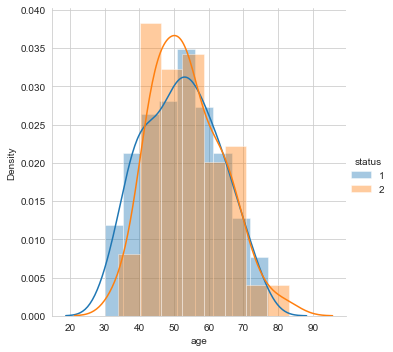

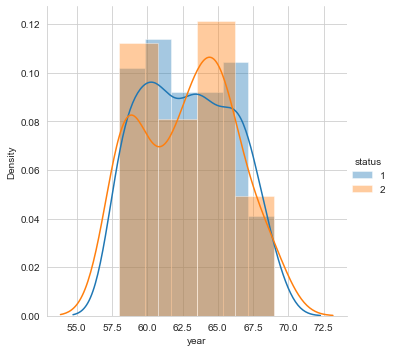

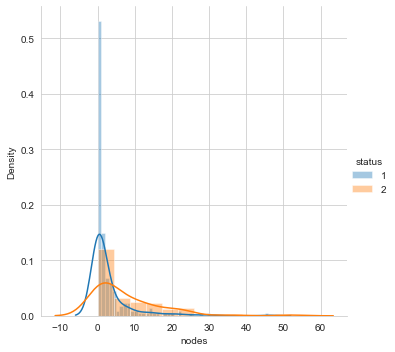

In [50]:
#code from kaggle
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

Observation from PDF.
1.) Most people between age 40 to 55 have not survived.
2.) Most of the patients who had their operations between 1958 to 1968 have not survived.

2.) Cumulative Density Function.

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


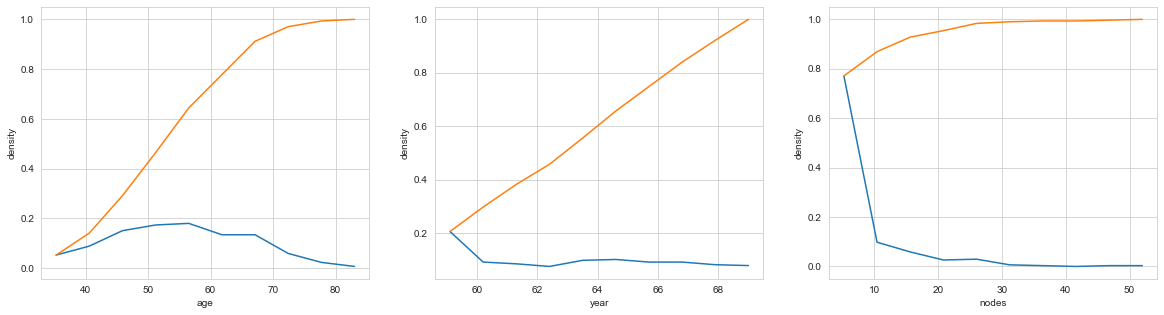

In [58]:
#CODE FROM KAGGLE.
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.ylabel("density")

OBSERVATION OF CDF'S.
83% of patients among the survived(225) had auxiliary nodes <= 5 i.e. 186 patients out of 225.

So if a patient has nodes <=5 there is 60% chance of survival in total.

In [37]:
print(df.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


3.) Box-plots

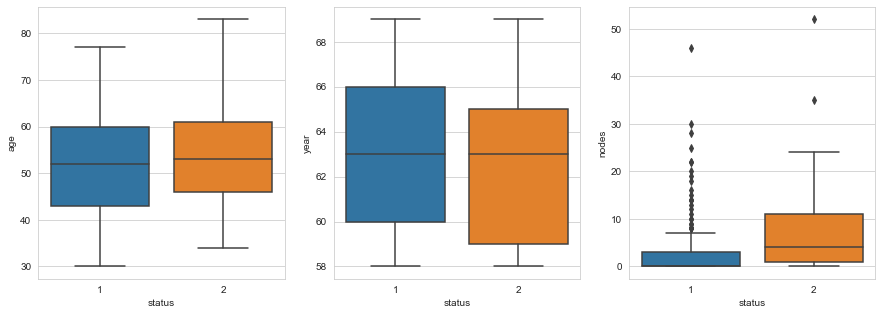

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=df, ax=axes[idx])
plt.show()  

1.) 50% patients survived between age 45 to 60.
2.) During year 1960-66 ,50% patients survived. 
3.) All patients having  nodes less than 5  survived.

4.) Violin -plots

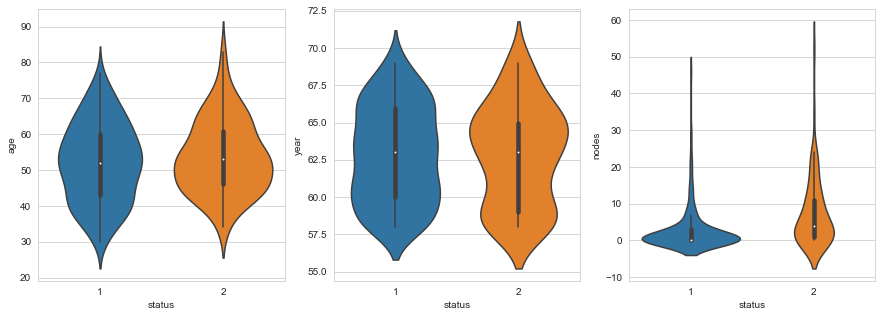

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=df, ax=axes[idx])
plt.show()  

1.) 50% people in the range 42-60 survived and 50% people in range 45-62 couldnt survive.
2.) 50% people who had their operation in year 61-66 survived and 50% people who had in year
58-65 couldnt survive.
3.) people who have nodes less than 5 survived.